<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Develop_a_Model_of_Diamond_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](https://curriculum-content.s3.amazonaws.com/data-science/images/diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [9]:
# load dataset
import pandas as pd
df = pd.read_csv('/content/diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# more info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [14]:
# descriptive stats
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [19]:
# check and handle duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [20]:
# check and handle missing values
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [15]:
!pip install statsmodels ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=140246540c953f836928888739975fc1c6521e12e2f4bdfce92805255577a999
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [17]:
# create ydata profile for profiling and seeing correlations
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_file('diamonds.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 14.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

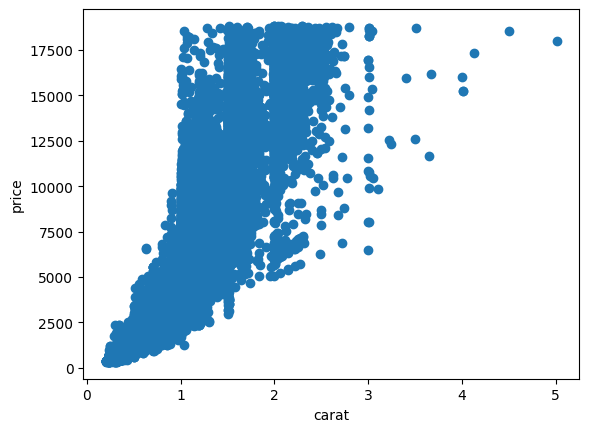

In [22]:
# plot predictor vs price
import matplotlib.pyplot as plt
plt.scatter(df['carat'], df['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [23]:
# identify variables
X_baseline = df[['carat']]
y = df['price']

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [42]:
# build a simple linear regression model using OLS
# from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm

X_baseline = sm.add_constant(X_baseline)

baseline_model = sm.OLS(y, X_baseline)
baseline_results = baseline_model.fit()
# baseline_model = LinearRegression()
# baseline_model.fit(X_baseline, y)

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [63]:
# evaluate OLS model
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.030e+05
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        13:31:33   Log-Likelihood:            -4.7145e+05
No. Observations:               53794   AIC:                         9.429e+05
Df Residuals:                   53792   BIC:                         9.429e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2260.6268     13.083   -172.793      0.000   -2286.269   -2234.984
carat       7763.6586     14.103    550.491      0.000    7736.016    7791.301
==============================================================================
Omnibus:                    13955.519   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153135.105
Skew:                           0.935   Prob(JB):                         0.00
Kurtosis:                      11.051   Cond. No.                         3.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

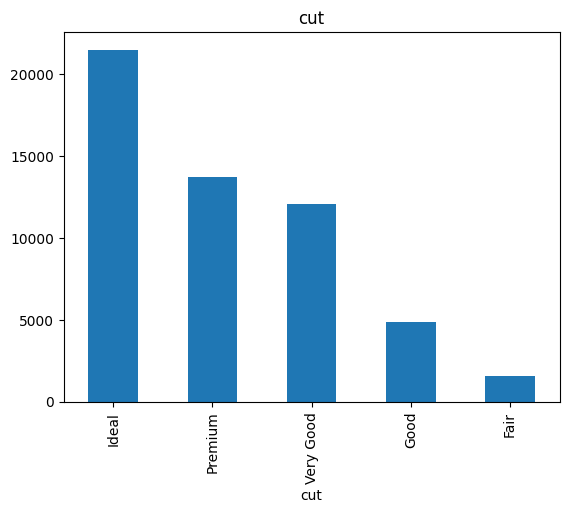

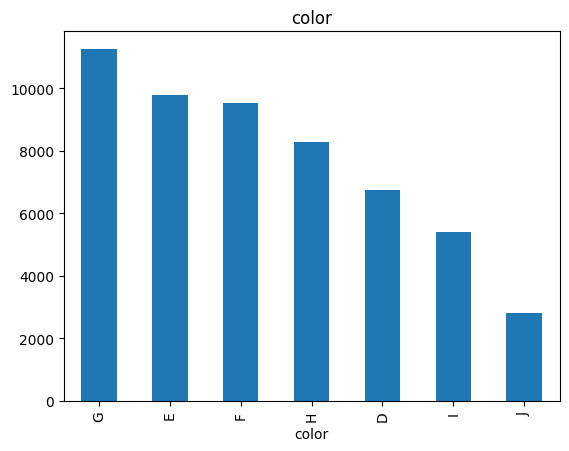

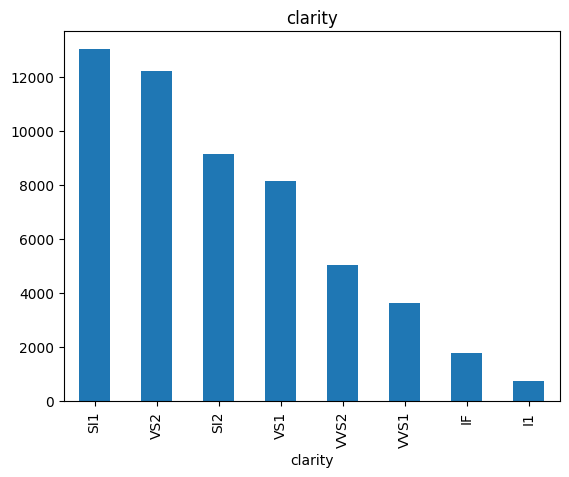

In [37]:
# create bar graphs for the categories present in each categorical feature
cat_cols = ['cut', 'color', 'clarity']
for col in cat_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference". For the "cut_Very Good" column that was generated when `pd.get_dummies` was used, we need to remove the space in the column name.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  int64  
 2   color    53794 non-null  int64  
 3   clarity  53794 non-null  int64  
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 6.5 MB


In [54]:
# convert categorical into numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

In [58]:
# identify X_iterated and y
X_iterated = df.drop(columns=['price'], axis=1)

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [60]:
# build the ols model
X_iterated = sm.add_constant(X_iterated)

iterated_model = sm.OLS(y, X_iterated)
iterated_results = iterated_model.fit()

## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [64]:
# evaluate model performance
iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 5.170e+04
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        13:31:44   Log-Likelihood:            -4.6418e+05
No. Observations:               53794   AIC:                         9.284e+05
Df Residuals:                   53785   BIC:                         9.285e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.676e+04    410.474     40.833      0.000     1.6e+04    1.76e+04
carat       1.106e+04     58.081    190.478      0.000    1.09e+04    1.12e+04
cut         4.055e-10   9.96e-12     40.708      0.000    3.86e-10    4.25e-10
color       -267.0474      3.596    -74.265      0.000    -274.095    -259.999
clarity      288.6593      3.491     82.677      0.000     281.816     295.502
depth       -164.6978      5.007    -32.896      0.000    -174.511    -154.885
table        -90.3065      2.801    -32.245      0.000     -95.796     -84.817
x          -1226.4255     39.137    -31.337      0.000   -1303.134   -1149.717
y             51.4847     23.070      2.232      0.026       6.268      96.701
z              6.8029     40.047      0.170      0.865     -71.690      85.296
==============================================================================
Omnibus:                    13520.477   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           533692.300
Skew:                           0.480   Prob(JB):                         0.00
Kurtosis:                      18.401   Cond. No.                     2.78e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.